### Data Exploration - Bureau Data

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [5]:
# Training Set
application_train = pd.read_csv('data/application_train.csv')
print("Loaded Training Set: {0} rows".format(application_train.shape[0]))

bureau_data = pd.read_csv('data/bureau.csv')
print("Loaded Bureau Set: {0} rows".format(bureau_data.shape[0]))

bureau_balance_data = pd.read_csv('data/bureau_balance.csv')
print("Loaded Bureau Balance Set: {0} rows".format(bureau_balance_data.shape[0]))


Loaded Training Set: 307511 rows
Loaded Bureau Set: 1716428 rows
Loaded Bureau Balance Set: 27299925 rows


### Inspect Data

#### Application Data

In [7]:
display(application_train.head(n=10))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Bureau Data

In [9]:
display(bureau_data.head(n=10))

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


#### Bureau Balance Data

In [8]:
display(bureau_balance_data.head(n=10))

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


### Utility Functions

In [11]:
# Visualize the contents of a non-numeric column

def explore_non_numeric(field, showDetails=True):

    # Inspired By: 
    # https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array

    unique, counts = np.unique(field, return_counts=True)
    total_records = np.size(field)

    if (showDetails): 
        i = 0
        while i < np.size(unique): 
            percentage = (counts[i] / total_records) * 100
            print("Value: {0} Count: {1} Percentage: {2}".format(unique[i], counts[i], percentage))
            i += 1

    # Example code from: https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
    fig1, ax1 = plt.subplots()
    ax1.pie(counts, labels=unique, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [12]:
# Visualize the contents of a numeric column

def explore_numeric(field, showUnique=False, graphType="dist", bins=20, showMeanLines=True):     
    mean = np.mean(field)
    avg = np.average(field)
    
    # Take a look at the range
    print("Max: {0} Min: {1} Mean: {2} Avg: {3} Std: {4}".format(
    np.max(field),
    np.min(field),
    mean,
    avg,
    np.std(field)))

    # Unique Values
    # print("Values: {0}".format(application_train['CNT_CHILDREN'].unique()))

    if (showUnique): 
    
        unique, counts = np.unique(application_train['CNT_CHILDREN'], return_counts=True)
        total_records = np.size(application_train['CNT_CHILDREN'])

        i = 0
        while i < np.size(unique): 
            percentage = (counts[i] / total_records) * 100
            print("Value: {0} Count: {1} Percentage: {2}".format(unique[i], counts[i], percentage))
            i += 1

    # Examine distribution
    plt.figure(figsize=(15,10))
    plt.title("Distribution Graph")
    if (showMeanLines):
        plt.axvline(avg, color="red")    # Plot the average
        plt.axvline(mean, color="green") # Plot the mean
    
    if (graphType == "hist"): 
        sns.distplot(field,bins=bins)
    else: 
        sns.distplot(field)

#### CREDIT_TYPE
Type of Credit Bureau credit (Car, cash,...)

Value: Another type of loan Count: 1017 Percentage: 0.05925095605524962
Value: Car loan Count: 27690 Percentage: 1.6132339952506018
Value: Cash loan (non-earmarked) Count: 56 Percentage: 0.003262589517299881
Value: Consumer credit Count: 1251615 Percentage: 72.91974961955876
Value: Credit card Count: 402195 Percentage: 23.43209269482903
Value: Interbank credit Count: 1 Percentage: 5.826052709464073e-05
Value: Loan for business development Count: 1975 Percentage: 0.11506454101191543
Value: Loan for purchase of shares (margin lending) Count: 4 Percentage: 0.00023304210837856292
Value: Loan for the purchase of equipment Count: 19 Percentage: 0.001106950014798174
Value: Loan for working capital replenishment Count: 469 Percentage: 0.027324187207386504
Value: Microloan Count: 12413 Percentage: 0.7231879228257754
Value: Mobile operator loan Count: 1 Percentage: 5.826052709464073e-05
Value: Mortgage Count: 18391 Percentage: 1.0714693537975377
Value: Real estate loan Count: 27 Percentage: 0.00

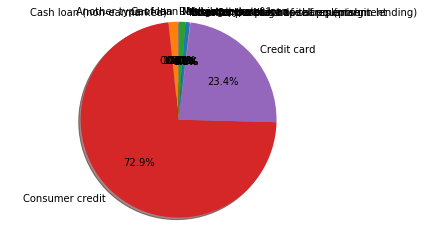

In [14]:
explore_non_numeric(bureau_data['CREDIT_TYPE'])

#### CREDIT_ACTIVE
Status of the Credit Bureau (CB) reported credits

Value: Active Count: 630607 Percentage: 36.739496209570106
Value: Bad debt Count: 21 Percentage: 0.0012234710689874554
Value: Closed Count: 1079273 Percentage: 62.87901385901419
Value: Sold Count: 6527 Percentage: 0.38026646034672007


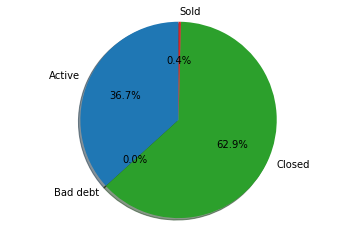

In [16]:
explore_non_numeric(bureau_data['CREDIT_ACTIVE'])

#### CREDIT_CURRENCY
Recoded currency of the Credit Bureau credit

Value: currency 1 Count: 1715020 Percentage: 99.91796917785074
Value: currency 2 Count: 1224 Percentage: 0.07131088516384025
Value: currency 3 Count: 174 Percentage: 0.010137331714467486
Value: currency 4 Count: 10 Percentage: 0.0005826052709464073


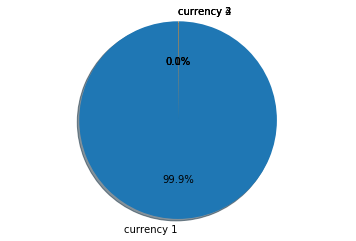

In [17]:
explore_non_numeric(bureau_data['CREDIT_CURRENCY'])

### DAYS_CREDIT
How many days before current application did client apply for Credit Bureau credit

Max: 0 Min: -2922 Mean: -1142.107684680045 Avg: -1142.107684680045 Std: 795.1646965716541


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


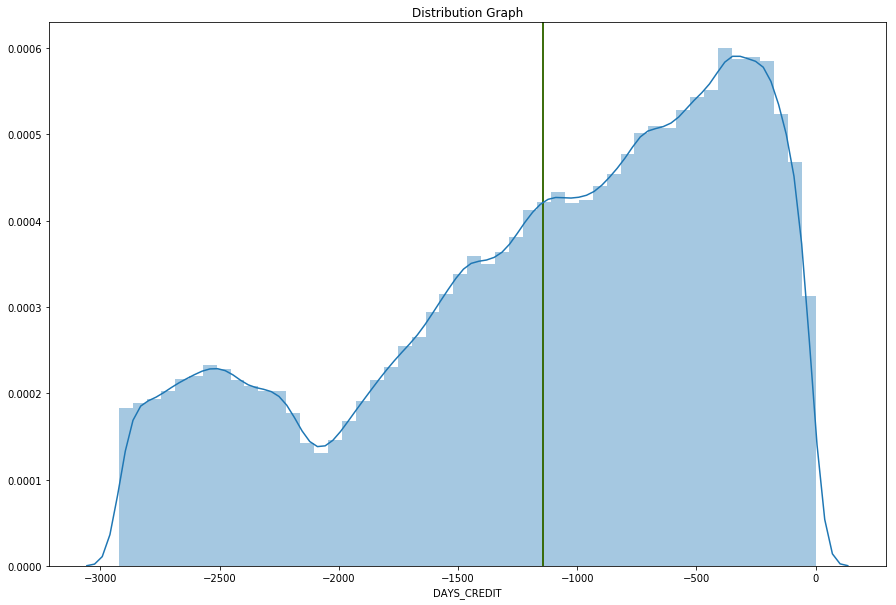

In [18]:
explore_numeric(bureau_data['DAYS_CREDIT'])   

##### CREDIT_DAY_OVERDUE
Number of days past due on CB credit at the time of application for related loan in our sample

Max: 2792 Min: 0 Mean: 0.8181665645165425 Avg: 0.8181665645165425 Std: 36.54441736067727


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


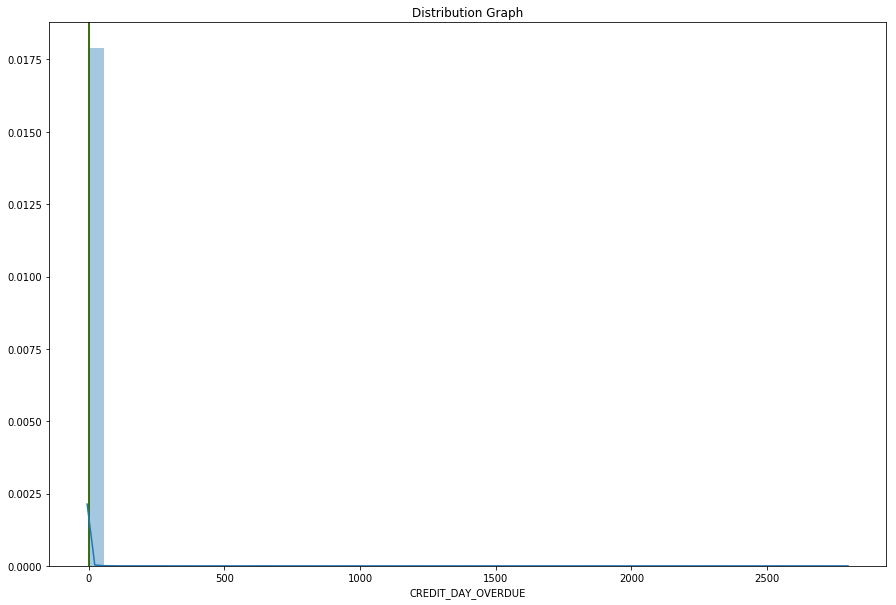

In [19]:
explore_numeric(bureau_data['CREDIT_DAY_OVERDUE'])

#### DAYS_CREDIT_ENDDATE
Remaining duration of CB credit (in days) at the time of application in Home Credit

Max: 31199.0 Min: -42060.0 Mean: 479.12272230469324 Avg: 479.12272230469324 Std: 4839.774610490461


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


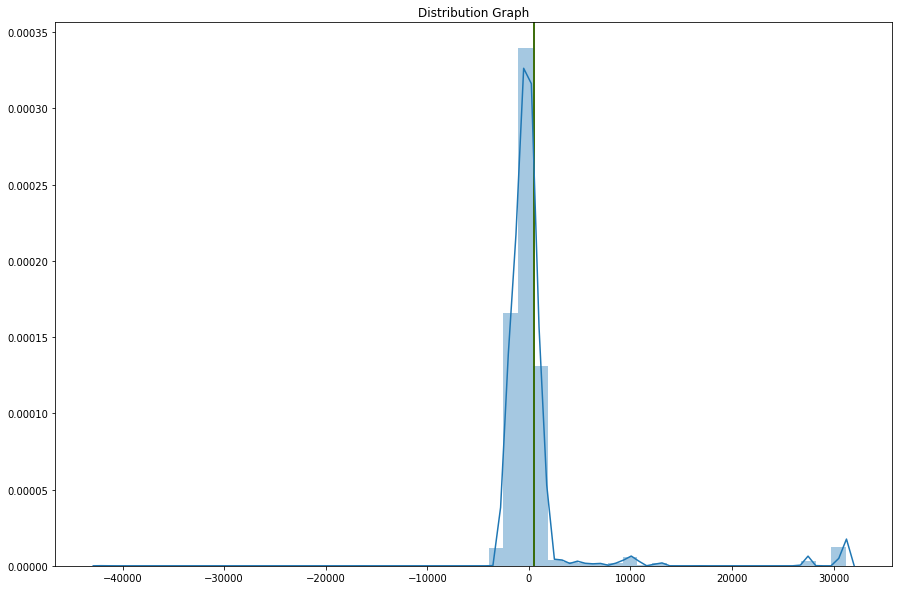

In [26]:
days_credit_enddate = np.nan_to_num(bureau_data['DAYS_CREDIT_ENDDATE'])
explore_numeric(days_credit_enddate)

#### DAYS_ENDDATE_FACT
Days since CB credit ended at the time of application in Home Credit (only for closed credit)

Max: 0.0 Min: -42023.0 Mean: -641.830305727942 Avg: -641.830305727942 Std: 750.1199610264179


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


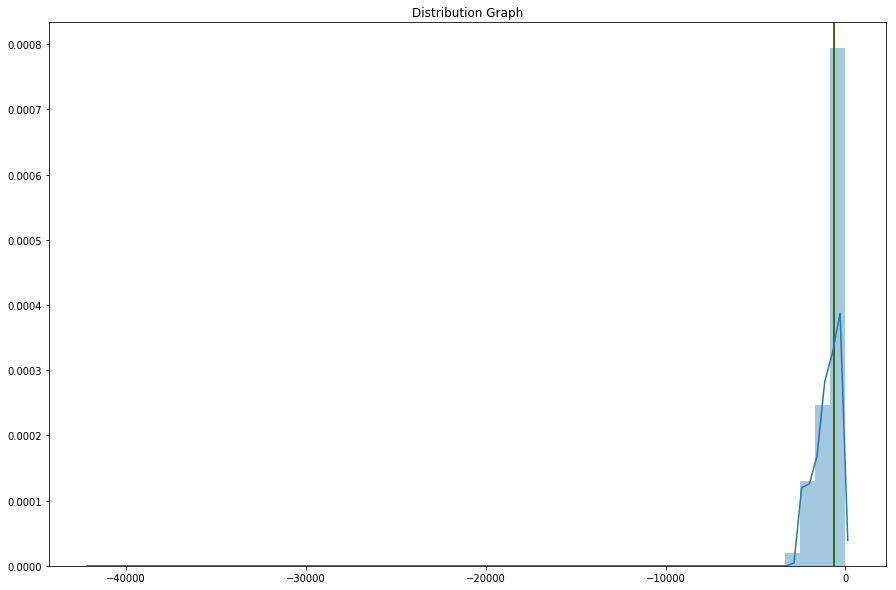

In [27]:
# Convert Non-Numerics
days_enddate = np.nan_to_num(bureau_data['DAYS_ENDDATE_FACT'], copy=True)
explore_numeric(days_enddate)

#### AMT_CREDIT_MAX_OVERDUE
Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

Max: 115987185.0 Min: 0.0 Mean: 1319.2617053636973 Avg: 1319.2617053636973 Std: 121006.46317626638


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


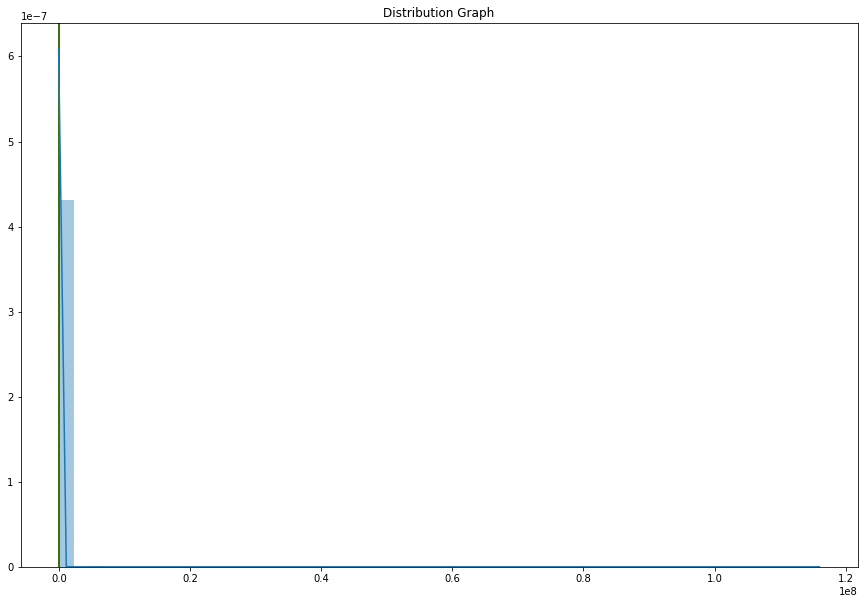

In [32]:
# Convert Non-Numerics
amt_credit_max_overdue = np.nan_to_num(bureau_data['AMT_CREDIT_MAX_OVERDUE'])
explore_numeric(amt_credit_max_overdue)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 18.568990277451633 Min: 0.0 Mean: 0.610186417215079 Avg: 0.610186417215079 Std: 2.256048667890433


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


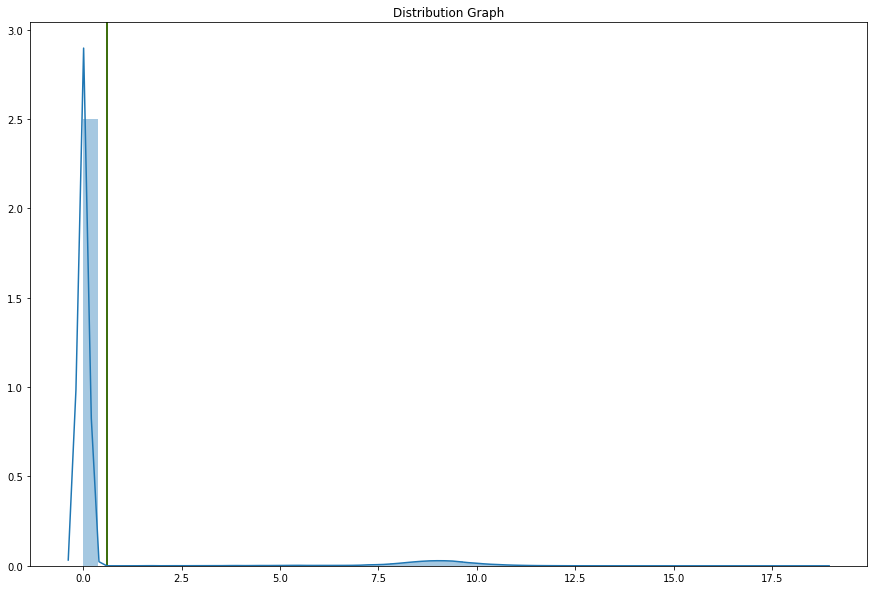

In [33]:
amt_credit_max_overdue = bureau_data['AMT_CREDIT_MAX_OVERDUE']
amt_credit_max_overdue_transformed = amt_credit_max_overdue.apply(lambda x: np.log(x + 1))
amt_credit_max_overdue_transformed_numeric = np.nan_to_num(amt_credit_max_overdue_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_max_overdue_transformed_numeric)

#### CNT_CREDIT_PROLONG
How many times was the Credit Bureau credit prolonged

Max: 9 Min: 0 Mean: 0.00641040579622332 Avg: 0.00641040579622332 Std: 0.09622387768971509


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


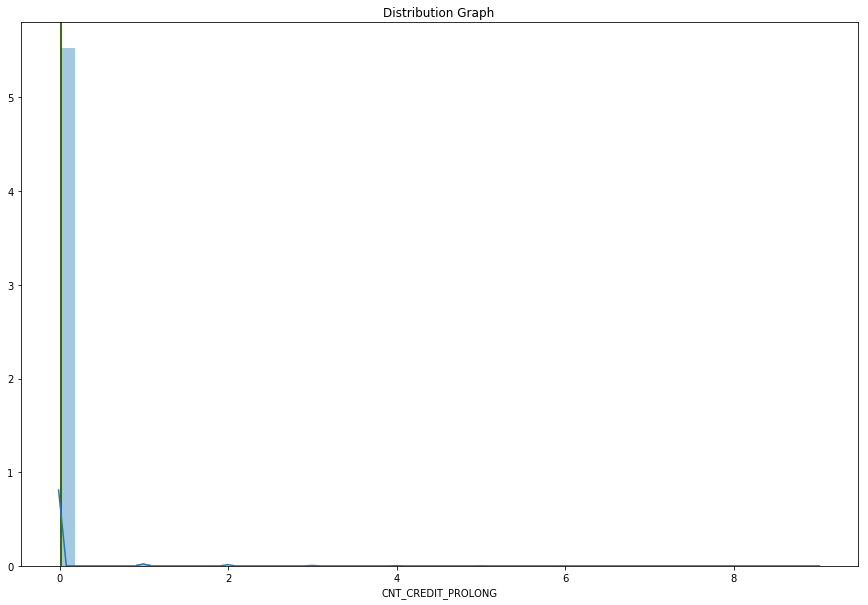

In [35]:
explore_numeric(bureau_data['CNT_CREDIT_PROLONG'])

#### AMT_CREDIT_SUM
Current credit amount for the Credit Bureau creditz

Max: 585000000.0 Min: 0.0 Mean: 354991.9032353073 Avg: 354991.9032353073 Std: 1149807.0698196827


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


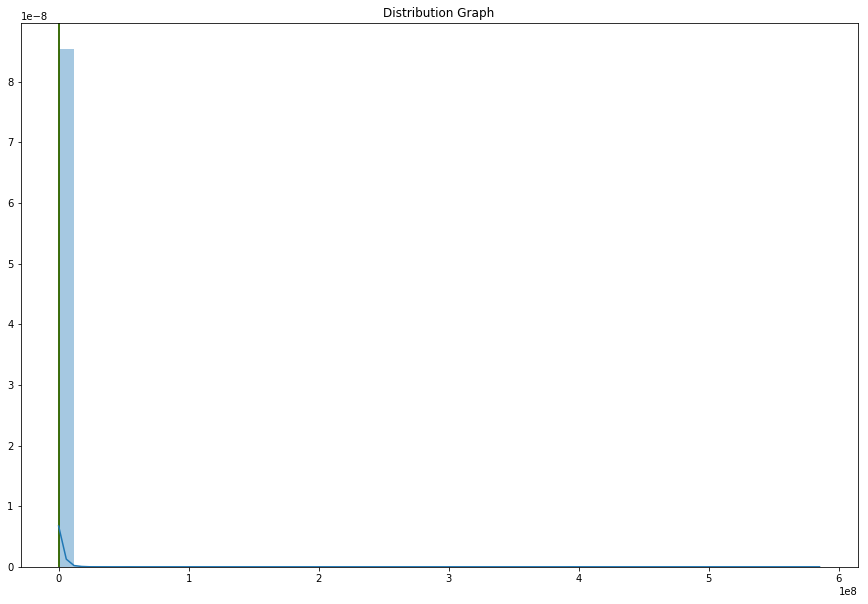

In [38]:
amt_credit_sum = bureau_data['AMT_CREDIT_SUM']
amt_credit_sum = np.nan_to_num(amt_credit_sum)

explore_numeric(amt_credit_sum)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 20.187122406905534 Min: 0.0 Mean: 11.408674277369942 Avg: 11.408674277369942 Std: 2.626797401787161


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


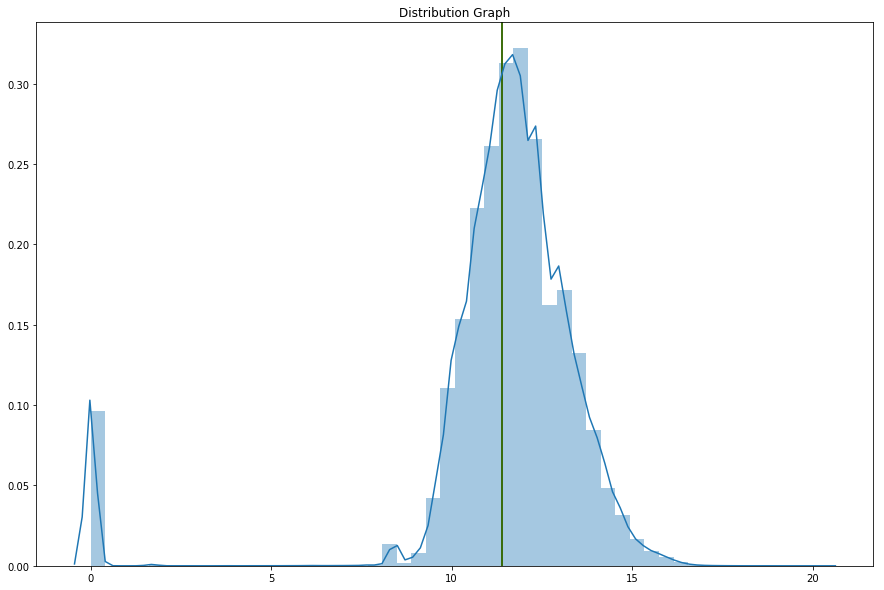

In [39]:
amt_credit_sum = bureau_data['AMT_CREDIT_SUM']
amt_credit_sum_transformed = amt_credit_sum.apply(lambda x: np.log(x + 1))
amt_credit_sum_transformed_numeric = np.nan_to_num(amt_credit_sum_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_transformed_numeric)

#### AMT_CREDIT_SUM_DEBT
Current debt on Credit Bureau credit

Max: 170100000.0 Min: -4705600.32 Mean: 116505.9952973815 Avg: 116505.9952973815 Std: 626405.636085571


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


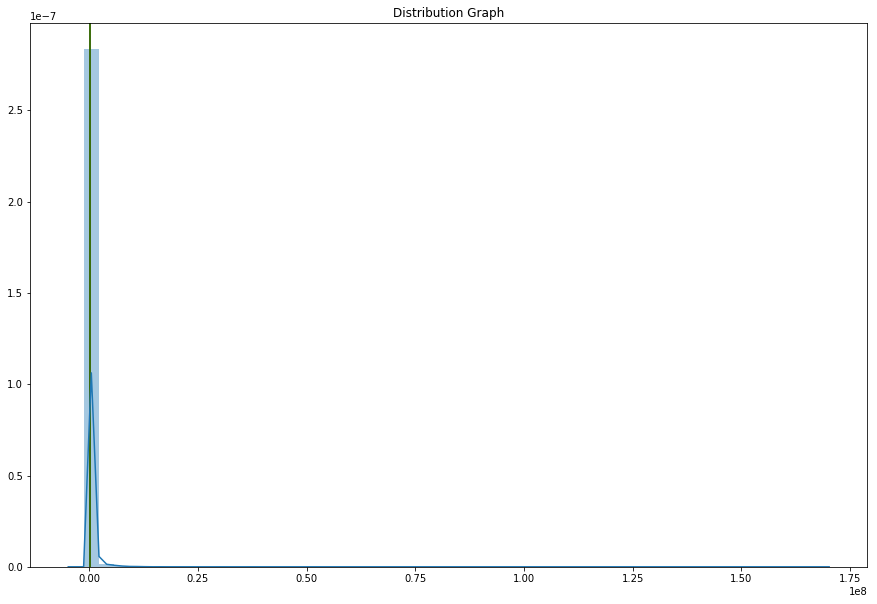

In [40]:
amt_credit_sum_debt = bureau_data['AMT_CREDIT_SUM_DEBT']
amt_credit_sum_debt = np.nan_to_num(amt_credit_sum_debt)

explore_numeric(amt_credit_sum_debt)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 18.951897063244985 Min: -4.605170185988091 Mean: 3.021237079439292 Avg: 3.021237079439292 Std: 5.256694412721233


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


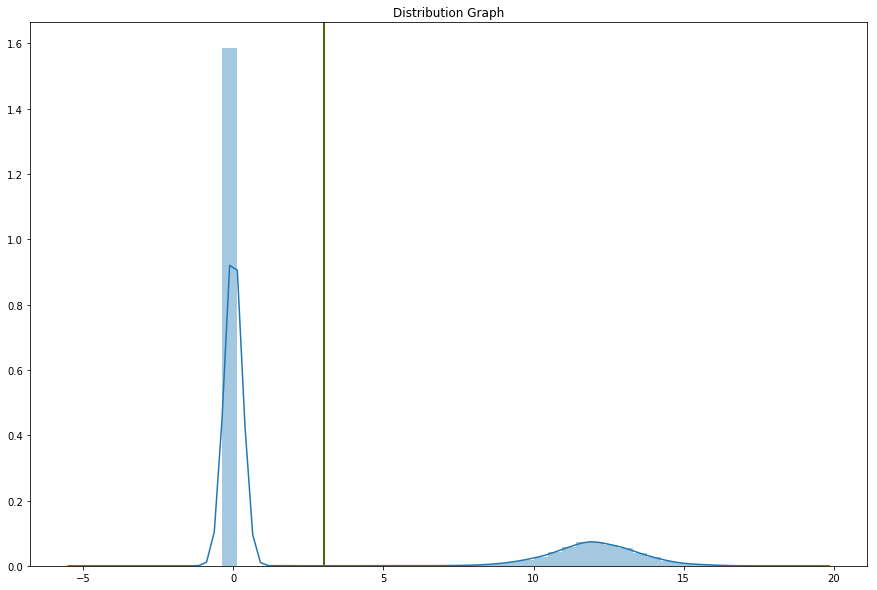

In [41]:
amt_credit_sum_debt = bureau_data['AMT_CREDIT_SUM_DEBT']
amt_credit_sum_debt_transformed = amt_credit_sum_debt.apply(lambda x: np.log(x + 1))
amt_credit_sum_debt_transformed_numeric = np.nan_to_num(amt_credit_sum_debt_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_debt_transformed_numeric)

#### AMT_CREDIT_SUM_LIMIT
Current credit limit of credit card reported in Credit Bureau

Max: 4705600.32 Min: -586406.115 Mean: 4081.739265244451 Avg: 4081.739265244451 Std: 36571.67496465721


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


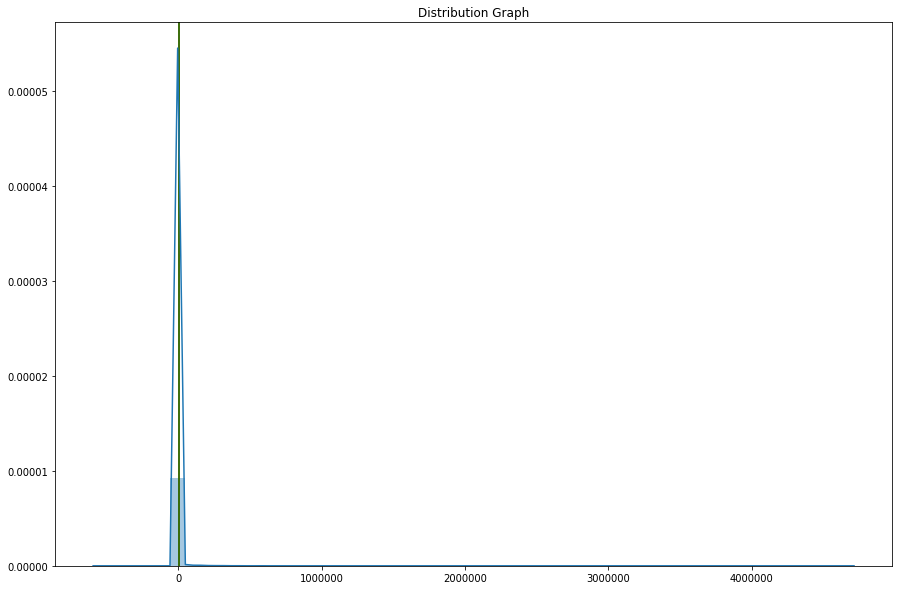

In [42]:
amt_credit_sum_limit = bureau_data['AMT_CREDIT_SUM_LIMIT']
amt_credit_sum_limit = np.nan_to_num(amt_credit_sum_limit)

explore_numeric(amt_credit_sum_limit)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.364264127298659 Min: -0.19845093872383818 Mean: 0.43162418297266103 Avg: 0.43162418297266103 Std: 2.09104664865829


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


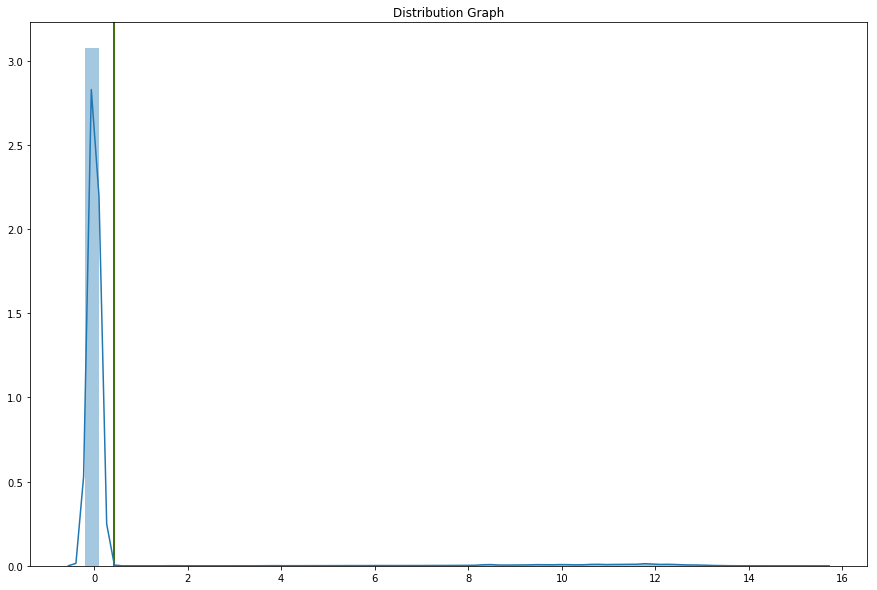

In [43]:
amt_credit_sum_limit = bureau_data['AMT_CREDIT_SUM_LIMIT']
amt_credit_sum_limit_transformed = amt_credit_sum_limit.apply(lambda x: np.log(x + 1))
amt_credit_sum_limit_transformed_numeric = np.nan_to_num(amt_credit_sum_limit_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_limit_transformed_numeric)

#### AMT_CREDIT_SUM_OVERDUE
Current amount overdue on Credit Bureau credit

Max: 3756681.0 Min: 0.0 Mean: 37.91275774165884 Avg: 37.91275774165884 Std: 5937.648305249403


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


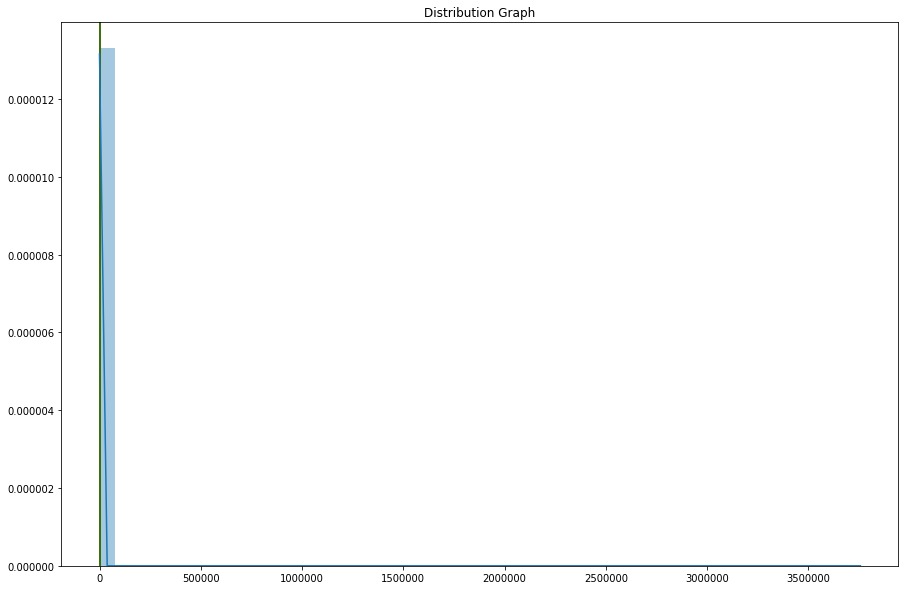

In [44]:
amt_credit_sum_overdue = bureau_data['AMT_CREDIT_SUM_OVERDUE']
amt_credit_sum_overdue = np.nan_to_num(amt_credit_sum_overdue)

explore_numeric(amt_credit_sum_overdue)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.139046678972173 Min: 0.0 Mean: 0.014190591395794587 Avg: 0.014190591395794587 Std: 0.31729931212689577


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


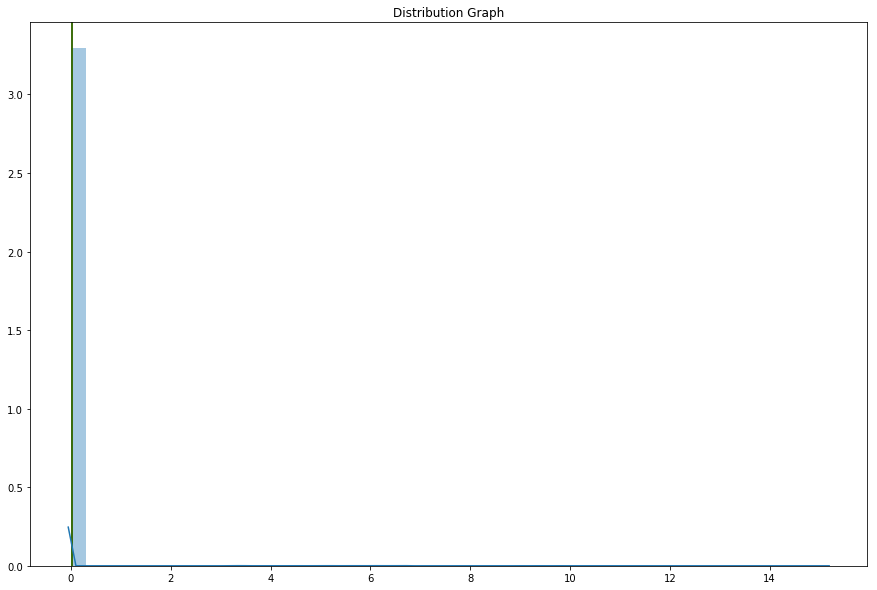

In [45]:
amt_credit_sum_overdue = bureau_data['AMT_CREDIT_SUM_OVERDUE']
amt_credit_sum_overdue_transformed = amt_credit_sum_overdue.apply(lambda x: np.log(x + 1))
amt_credit_sum_overdue_transformed_numeric = np.nan_to_num(amt_credit_sum_overdue_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_overdue_transformed_numeric)

#### DAYS_CREDIT_UPDATE
How many days before loan application did last information about the Credit Bureau credit come

Max: 372 Min: -41947 Mean: -593.7483197663986 Avg: -593.7483197663986 Std: 720.7471015455408


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


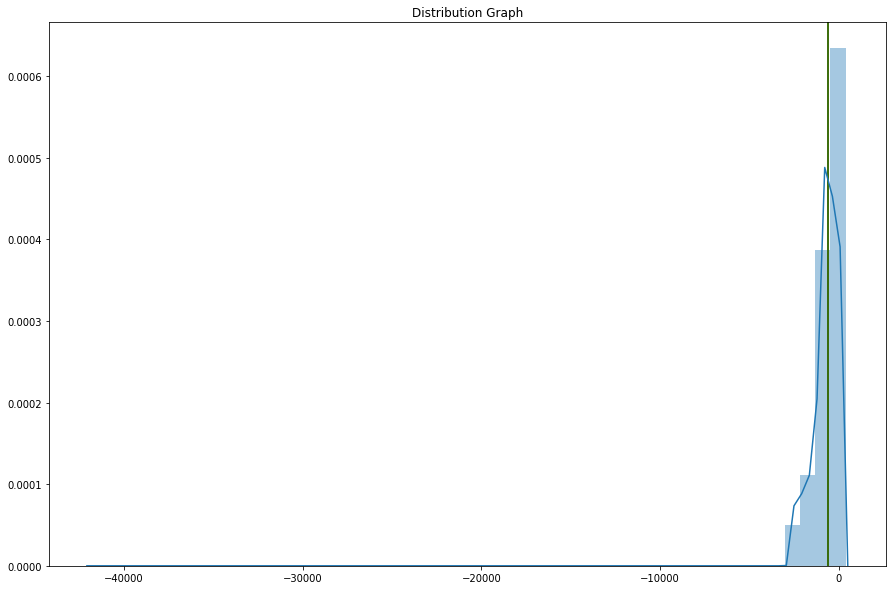

In [46]:
days_credit_update = np.nan_to_num(bureau_data['DAYS_CREDIT_UPDATE'])
explore_numeric(days_credit_update)

#### MONTHS_BALANCE
Month of balance relative to application date 

NOTE: There's a one-to-many relationship between bureau_balance_data and bureau_data, and this dataset is really large.  We'll need to do some feature engineering, like summing up the records per SK_BUREAU_ID or something just to make this managable.  This graph took ~15 minutes to draw... 

Max: 0 Min: -96 Mean: -30.74168665298531 Avg: -30.74168665298531 Std: 23.864508540931165


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


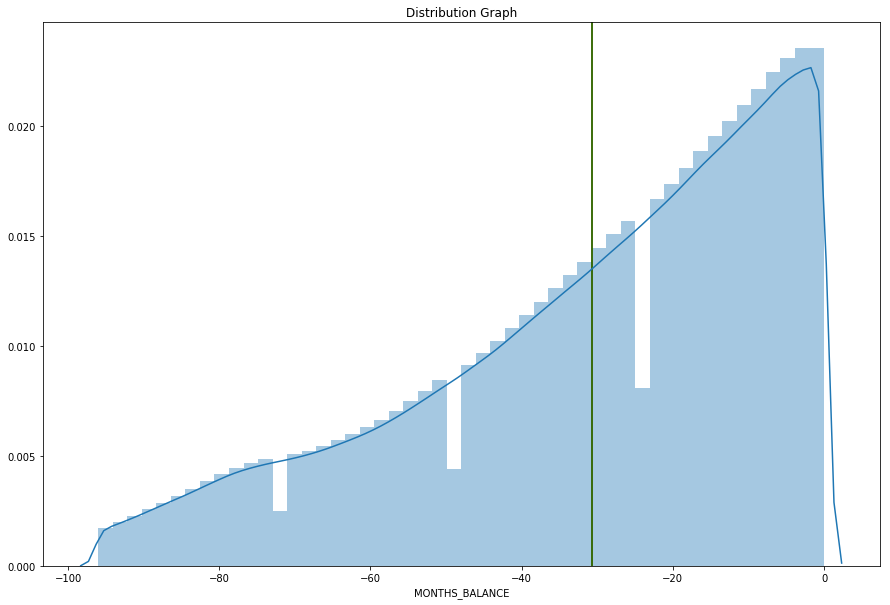

In [50]:
explore_numeric(bureau_balance_data['MONTHS_BALANCE'])

#### STATUS
Status of Credit Bureau loan during the month (active, closed, DPD0-30,ÔøΩ [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,ÔøΩ 5 means DPD 120+ or sold or written off ]

Value: 0 Count: 7499507 Percentage: 27.470797080944358
Value: 1 Count: 242347 Percentage: 0.8877203875102222
Value: 2 Count: 23419 Percentage: 0.08578411845453787
Value: 3 Count: 8924 Percentage: 0.03268873449286033
Value: 4 Count: 5847 Percentage: 0.0214176412572562
Value: 5 Count: 62406 Percentage: 0.22859403459899616
Value: C Count: 13646993 Percentage: 49.98912268073997
Value: X Count: 5810482 Percentage: 21.283875322001798


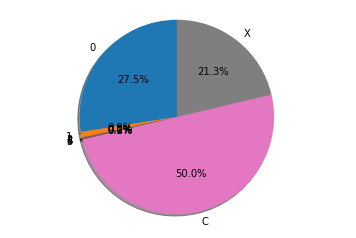

In [52]:
explore_non_numeric(bureau_balance_data['STATUS'])